In [1]:
import tensorflow as tf   # library for ai and ml . it has particular focus on training and interference of deep neural network
from tensorflow.keras import models,layers #model group layers into an object with training and interference features
import matplotlib.pyplot as plt # to plot graphs (plotting library)

In [2]:
Image_Size=256  # each image size
Batch_Size=32  #batch size (total images are divided into 32 batches)
EPOCHS=30 #An epoch is when all the training data is used at once and is defined as the total number of iterations 
#of all the training data in one cycle for training the machine learning model. 
Channels=3

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory("Plant Village",shuffle=True,image_size=(Image_Size,Image_Size),batch_size=Batch_Size)

Found 39134 files belonging to 21 classes.


In [4]:
class_names=dataset.class_names #class names are stored in class_names

In [5]:
class_names #class names are given

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [6]:
len(class_names) #no of class names 

21

In [7]:
len(dataset) # length of dataset which is divided into 32 batches

1223

In [1]:
1223*32 #this is why 32*574 gives total no of files or images

39136

In [9]:
for image_batch, label_batch in dataset.take(1): # it gives 1 batch of size 32
    print(label_batch[0].numpy()) 
    print(image_batch[0].shape)    # rgb value of 1st images with dimension3  

4
(256, 256, 3)


In [10]:
for image_batch, label_batch in dataset.take(1): # it gives 1 batch of size 32
    print(label_batch.numpy()) 
    print(image_batch.shape)

[ 5  3  9 20  4  5  1  9 16  2 20 12  5 13  2 15  7  8  3 16 16 12 18 18
  2  4  3 18 20 13 11  6]
(32, 256, 256, 3)


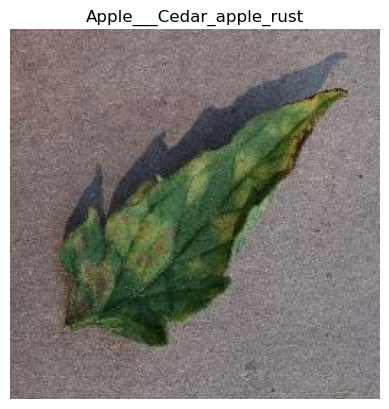

In [11]:
for image_batch, label_batch in dataset.take(1): # it gives 1 batch of size 32
#   plt.imshow(image_batch[0].numpy()) print image from float values
    plt.imshow(image_batch[0].numpy().astype("uint8")) #converted to int
    plt.axis("off") #hides axis from the image
    plt.title(class_names[label_batch[1]]) #defines class name

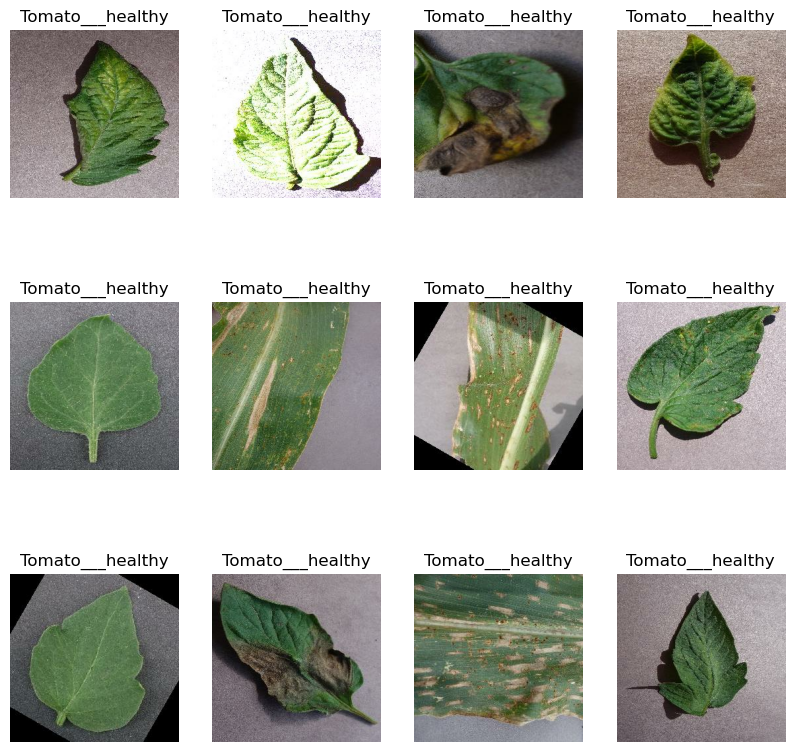

In [12]:
plt.figure(figsize=(10,10)) #size the figure
for image_batch, label_batch in dataset.take(1): # it gives 1 batch of size 32
    for i in range(12):
        ax=plt.subplot(3,4,i+1) #it gives the no of rows and cols in which image will be shown and i will be incremented
        plt.imshow(image_batch[i].numpy().astype("uint8")) #converted to int
        plt.axis("off") #hides axis from the image
        plt.title(class_names[label_batch[1]]) #defines class name

In [13]:
#80% training
#10% validate
#10% test

In [14]:
#train test split
train_size=0.8 #Since train size is 80%
len(dataset)*train_size #taking 80% of dataset

978.4000000000001

In [15]:
train_ds=dataset.take(978) #taking starting 459 as train dataset
len(train_ds) #length of train dataset

978

In [16]:
test_ds=dataset.skip(978) #skipping train dataset and taking left dataset as test dataset
len(test_ds) #length of test dataset 

245

In [17]:
val_size=0.1 #now taking validate dataset from test dataset
len(dataset)*val_size #0.1 of dataset

122.30000000000001

In [18]:
val_ds=test_ds.take(122) #now taking validate dataset as 57 images from test dataset
len(val_ds) #length of validate dataset

122

In [19]:
test_ds=test_ds.skip(122)  # now taking test dataet by skipping previous test dataset
len(test_ds) #length of test dataset

123

In [20]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000): #making a function to find train,validatae,test dataset
    ds_size=len(ds)             #taking length of dataset
    if shuffle:             #if shuffle is true
        ds=ds.shuffle(shuffle_size,seed=12) #shuffling the dataset
    train_size=int(train_split*ds_size)  #finding the size of train dataset
    val_size=int(val_split*ds_size)  #finding the size of validate dataset 
    train_ds=ds.take(train_size) #finding the train dataset
    val_ds=ds.skip(train_size).take(val_size) #finding the validate dataset
    test_ds=ds.skip(train_size).take(val_size) #finding the test dataset
    return train_ds,val_ds,test_ds #returning all the datasets

In [21]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset) #calling the function and getting the data in train,validate,test dataset

In [22]:
len(train_ds) #finding the length of train

978

In [23]:
len(val_ds)

122

In [24]:
len(test_ds)

122

In [25]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [26]:
resize_and_rescale =tf.keras.Sequential([layers.experimental.preprocessing.Resizing(Image_Size,Image_Size),
                    layers.experimental.preprocessing.Rescaling(1.0/255)])

In [27]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [28]:
input_shape = (Batch_Size, Image_Size, Image_Size, Channels)
n_classes = 21

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)


In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (32, 30, 30, 64)         

In [30]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [31]:
# fit the model
#fit_generator(object, generator, steps_per_epoch, epochs = 1,
#verbose = getOption("keras.fit_verbose", default = 1),
#callbacks = NULL, view_metrics = getOption("keras.view_metrics",
#default = "auto"), validation_data = NULL, validation_steps = NULL,
#class_weight = NULL, max_queue_size = 10, workers = 1,
#initial_epoch = 0)

#model.fit(x=train_batches, steps_per_epoch=len(train_batches), validation_data=valid_batches,
          #validation_steps=len(valid_batches), epochs=10, verbose=1 )
history = model.fit(
    train_ds,
    batch_size=Batch_Size,
    validation_data=val_ds,
    verbose=1,
    epochs=30,
)

Epoch 1/30
978/978 [==============================] - 1511s 1s/step - loss: 1.7807 - accuracy: 0.4222 - val_loss: 1.1723 - val_accuracy: 0.6087
Epoch 2/30
978/978 [==============================] - 1384s 1s/step - loss: 0.7406 - accuracy: 0.7545 - val_loss: 0.4252 - val_accuracy: 0.8590
Epoch 3/30
978/978 [==============================] - 1386s 1s/step - loss: 0.4625 - accuracy: 0.8441 - val_loss: 0.3824 - val_accuracy: 0.8669
Epoch 4/30
978/978 [==============================] - 1319s 1s/step - loss: 0.3379 - accuracy: 0.8851 - val_loss: 0.2516 - val_accuracy: 0.9114
Epoch 5/30
978/978 [==============================] - 1300s 1s/step - loss: 0.2837 - accuracy: 0.9015 - val_loss: 0.3036 - val_accuracy: 0.8939
Epoch 6/30
978/978 [==============================] - 1292s 1s/step - loss: 0.2259 - accuracy: 0.9212 - val_loss: 0.1561 - val_accuracy: 0.9474
Epoch 7/30
978/978 [==============================] - 1305s 1s/step - loss: 0.1968 - accuracy: 0.9324 - val_loss: 0.1533 - val_accuracy:

In [32]:
scores = model.evaluate(test_ds)

978/978 [==============================] - 363s 371ms/step - loss: 0.0267 - accuracy: 0.9908


In [33]:
scores

[0.026707515120506287, 0.9907655715942383]

In [34]:
history

In [35]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 978}

In [36]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

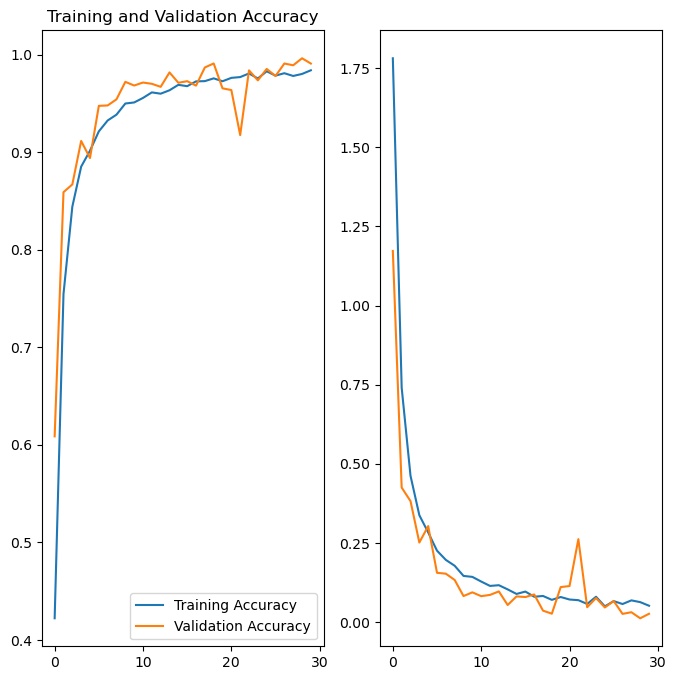

In [38]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.show()

first image to predict
First image's actual label:  Tomato___Target_Spot
predicted label: Tomato___Target_Spot


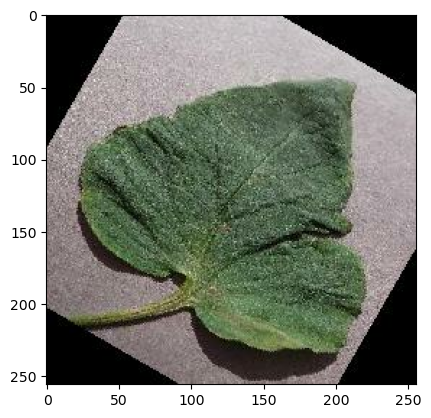

In [39]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("First image's actual label: ",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [40]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

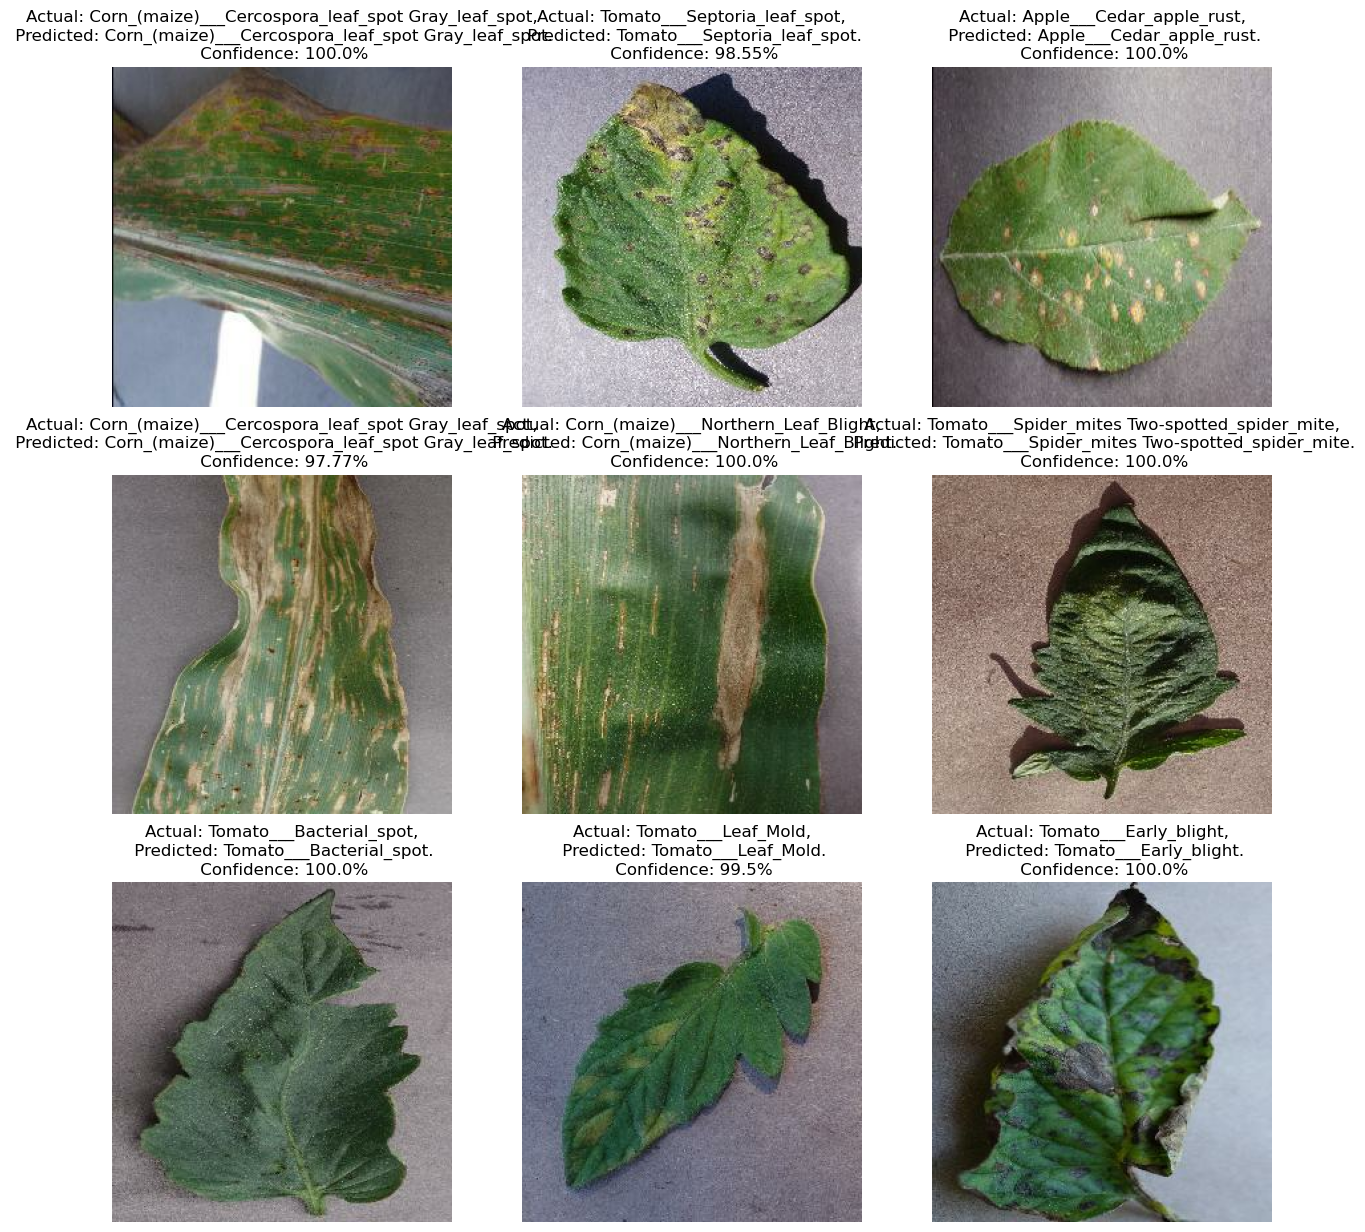

In [41]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [44]:
import os
model_version=max([int(i) for i in os.listdir("C:/Users/hp/Documents/Project/tomato-disease/training/full_models") + [0]])+1
model.save(f"C:/Users/hp/Documents/Project/tomato-disease/training/full_models/{model_version}")

INFO:tensorflow:Assets written to: C:/Users/hp/Documents/Project/tomato-disease/training/full_models/2\assets
